In [2]:
import torch
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from joint_embedding_learning.utils.analysis_tools import load_embeddings, apply_tsne, plot_tsne
import pandas as pd

In [3]:
# Select results comparison
dataset = 'tactile'
model_type = 'simclr'

In [4]:
results_dir = os.path.join('/home/samanta/CMTJE/checkpoints', dataset, model_type)
runs = os.listdir(results_dir)

### Downstream Task Results

In [1]:
results_list = []
for run in runs:
    run_results = os.path.join(results_dir, run, 'results.csv')
    df = pd.read_csv(run_results)
    results_list.append({'run': run, 'Train Bubbles Accuracy': df['Train Bubbles Accuracy'].values[-1], 'Train Gelslim Accuracy': df['Train Gelslim Accuracy'].values[-1], 'Test Bubbles Accuracy': df['Test Bubbles Accuracy'].values[-1], 'Test Gelslim Accuracy': df['Test Gelslim Accuracy'].values[-1]}) 

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by=['Test Gelslim Accuracy'], ascending=False)
results_df

NameError: name 'runs' is not defined

Run: dataset_1_run_no_emdb_loss


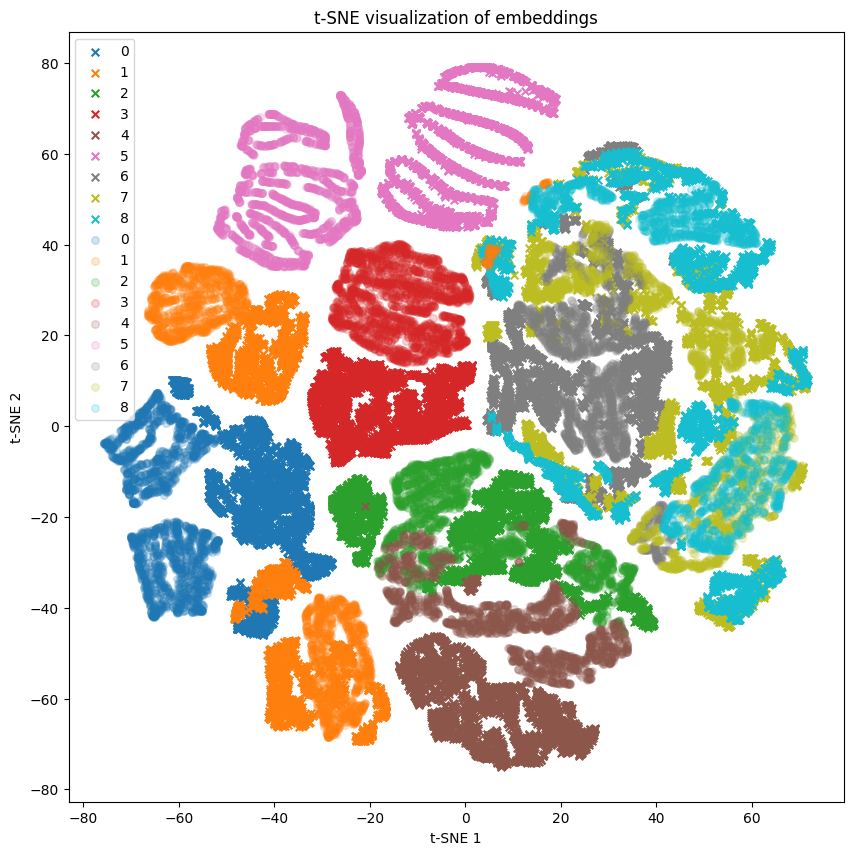

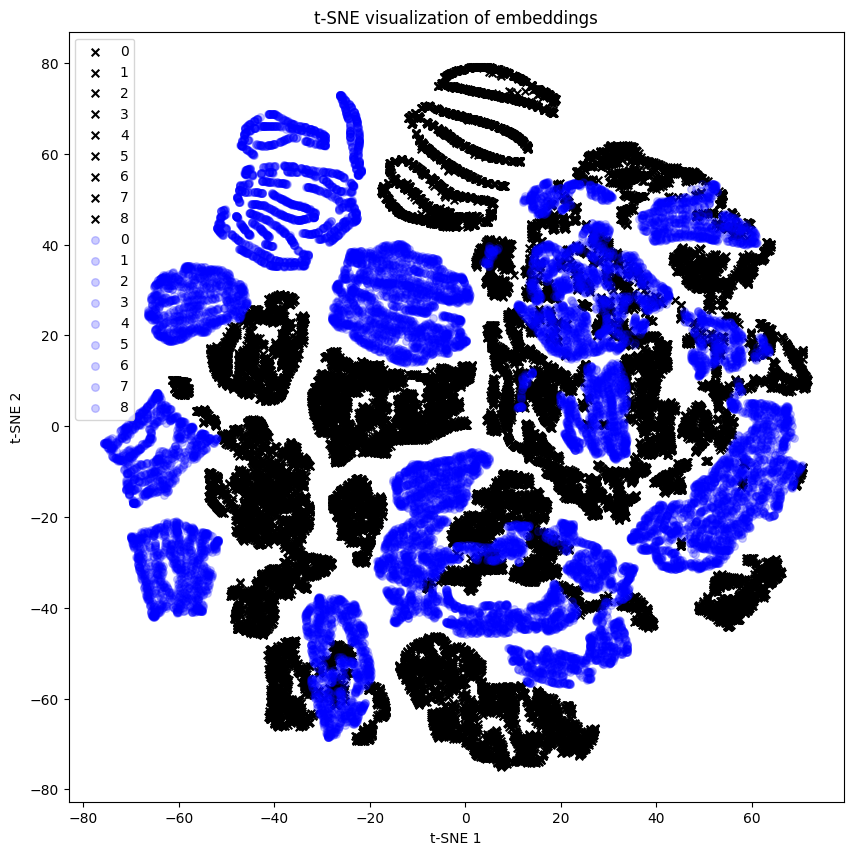

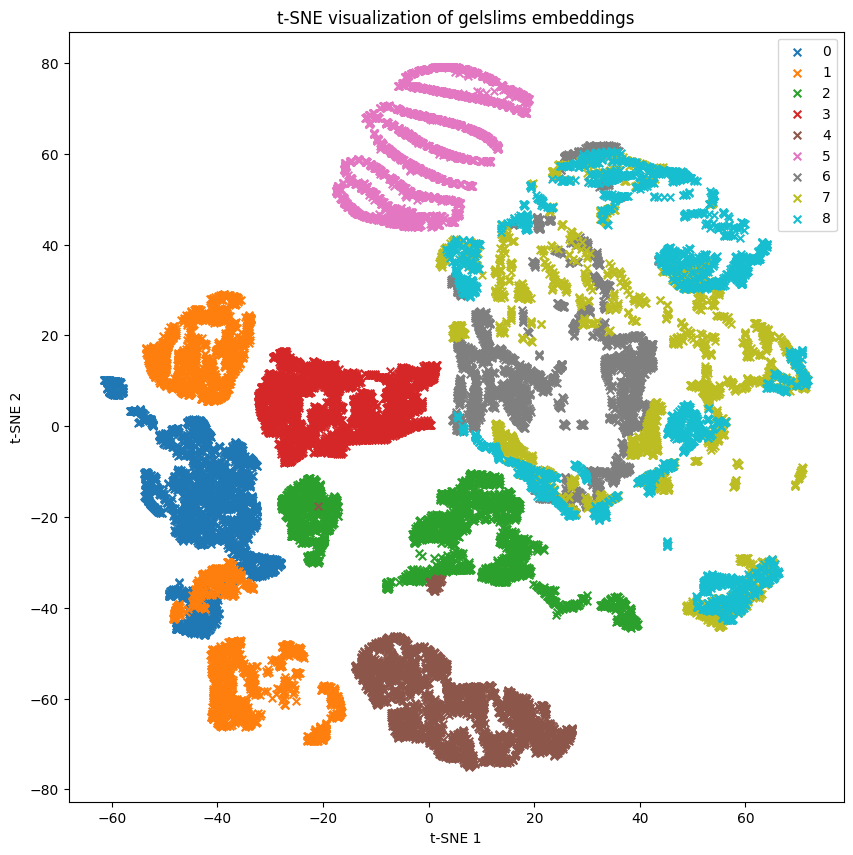

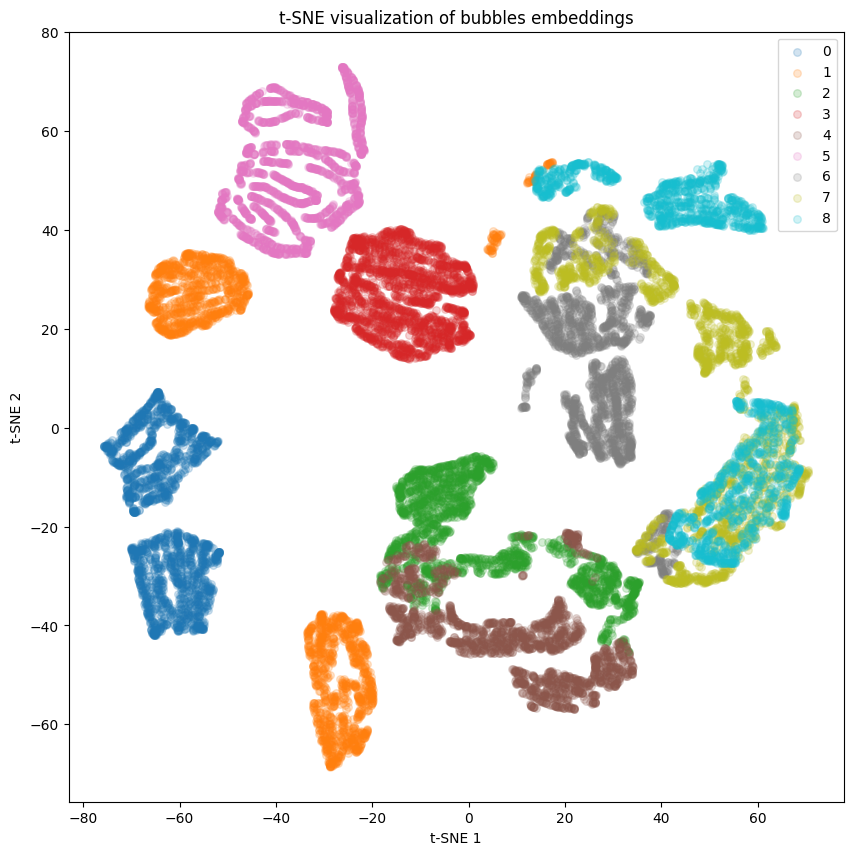

Run: dataset_1_run_no_val_log


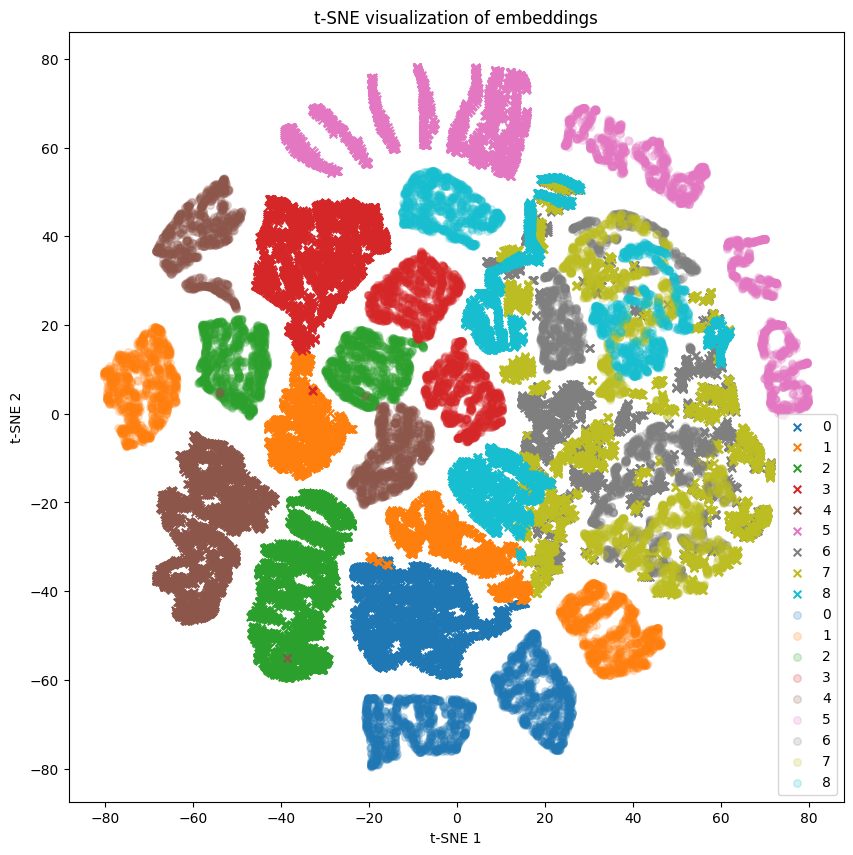

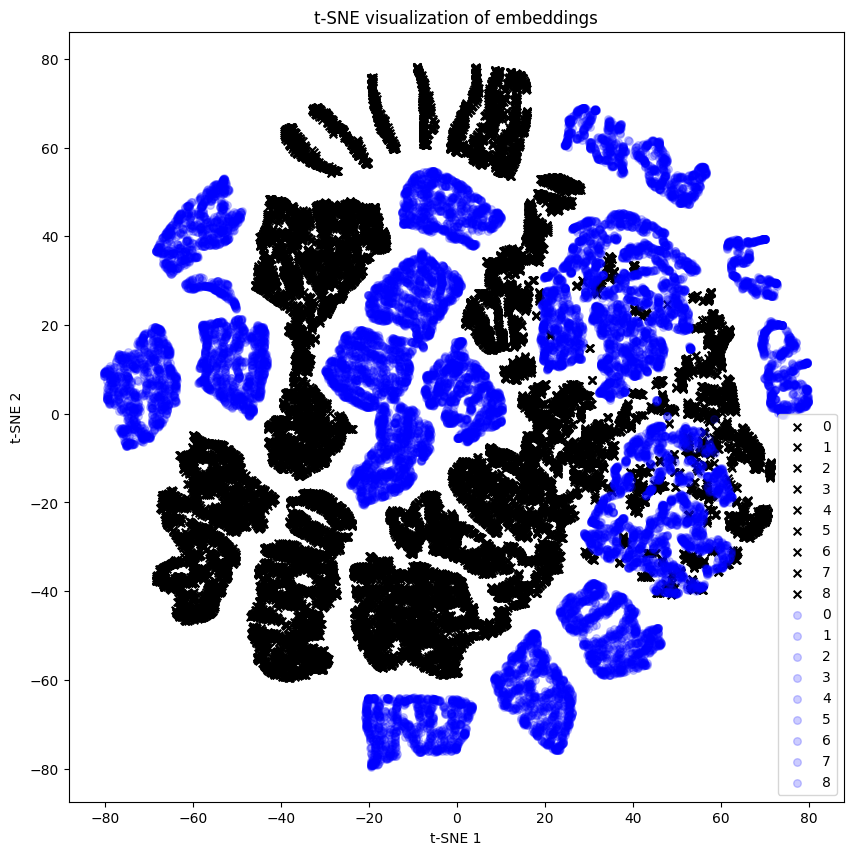

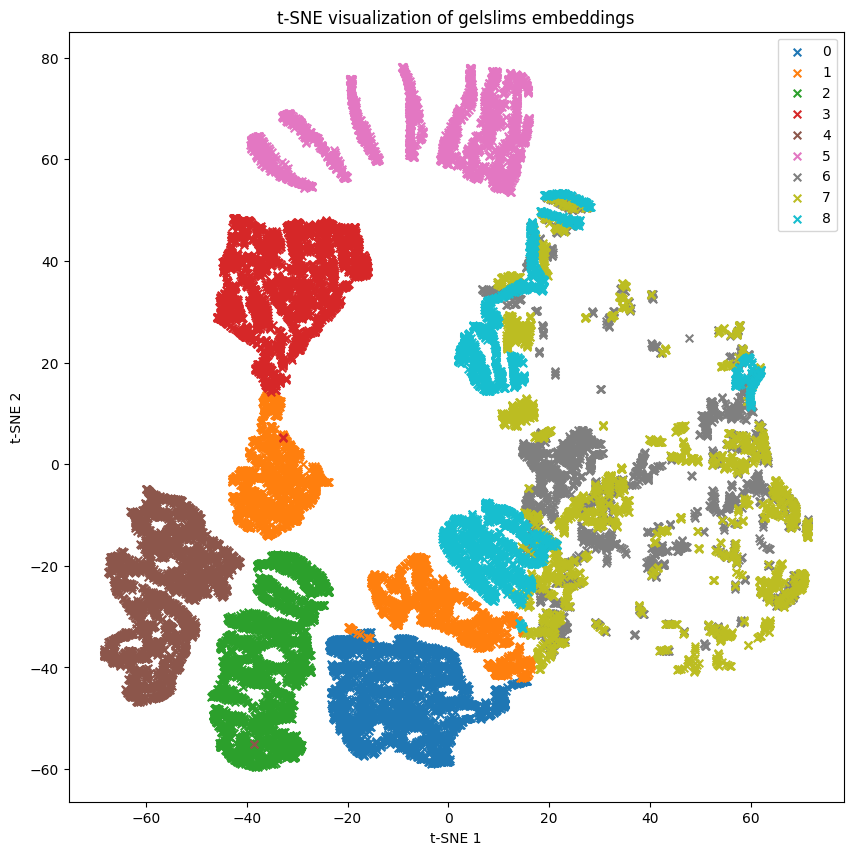

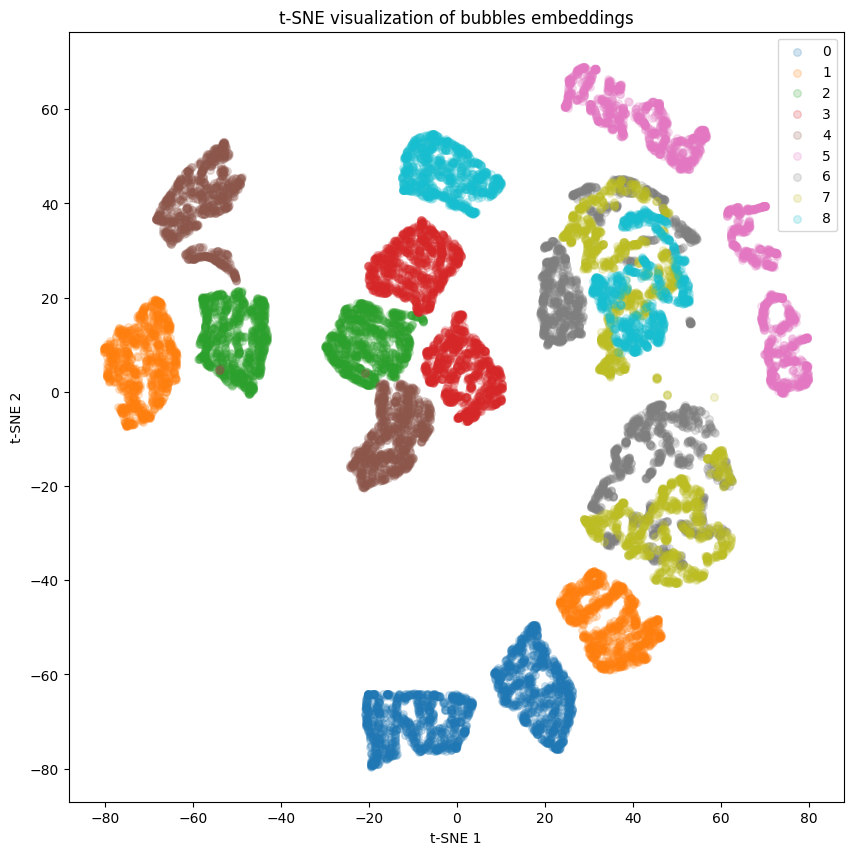

Run: dataset_1_run_no_val_log_no_emdb_loss


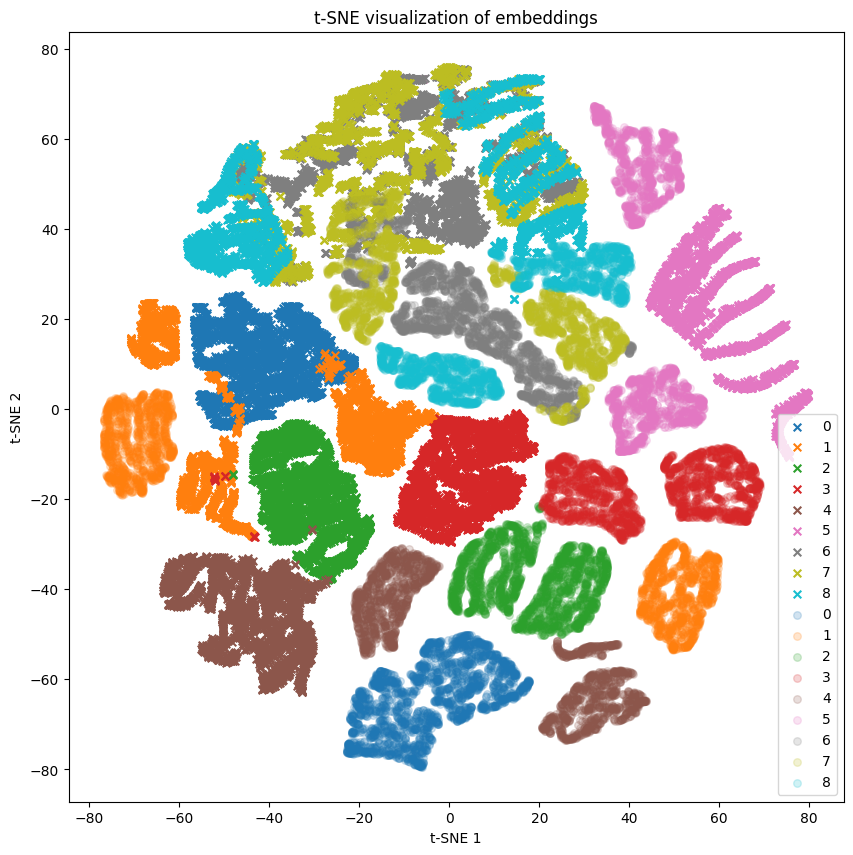

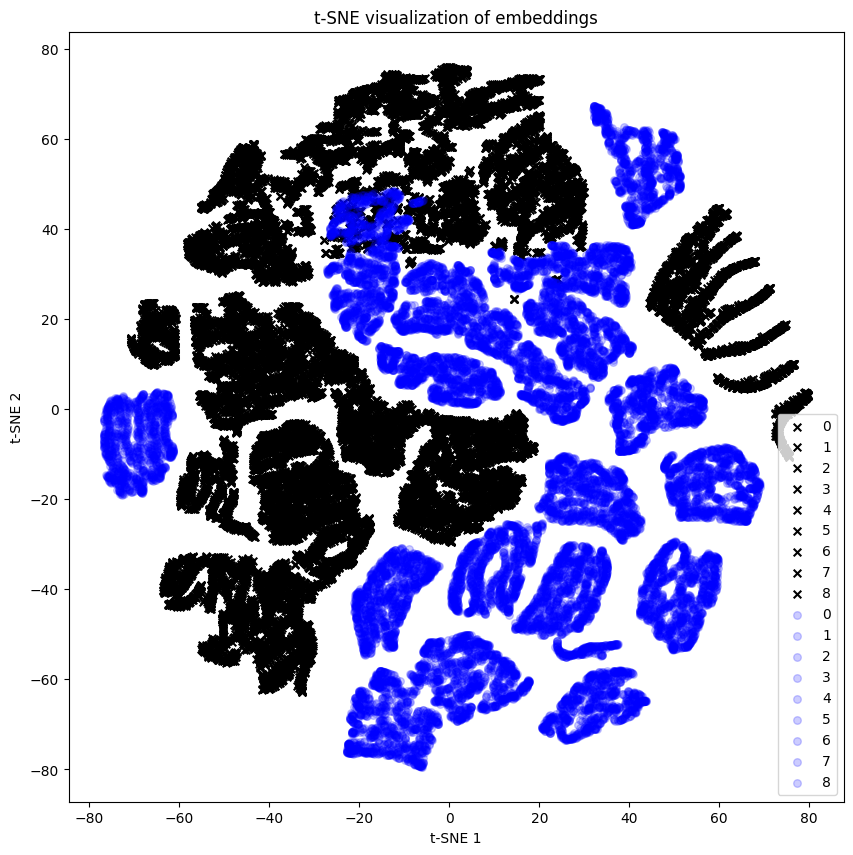

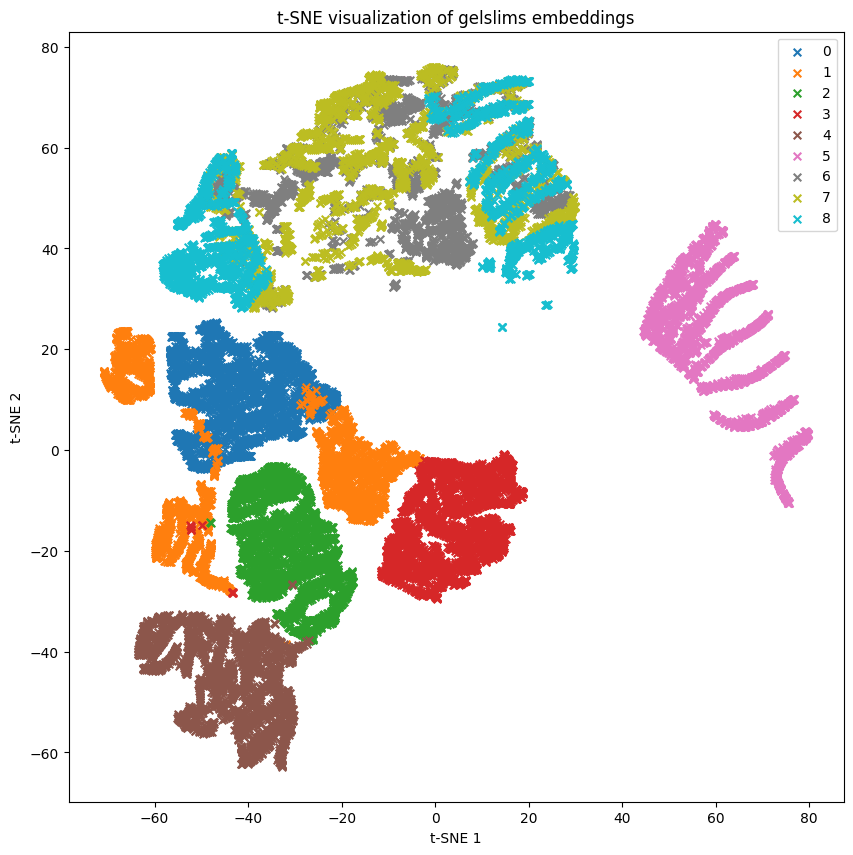

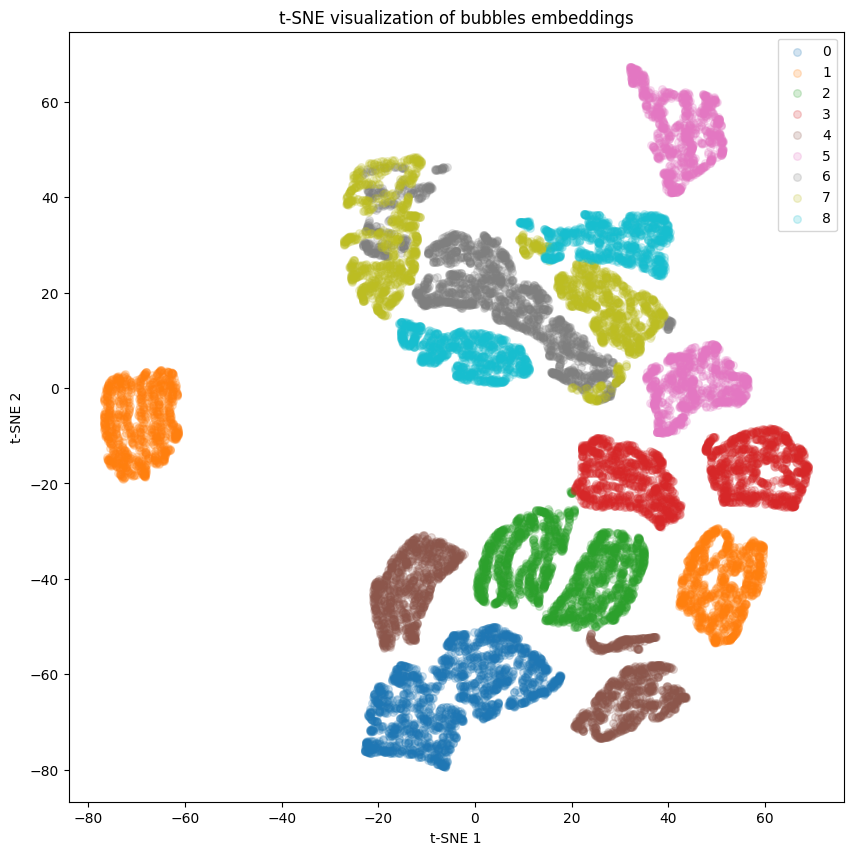

Run: dataset_1_run_no_emdb_loss_2


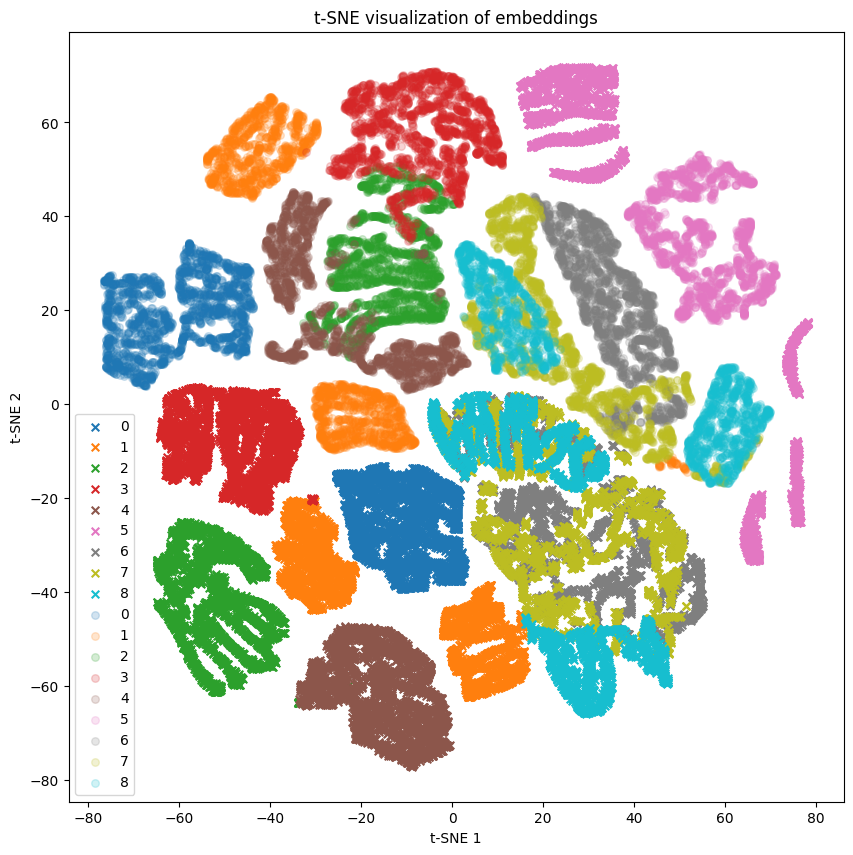

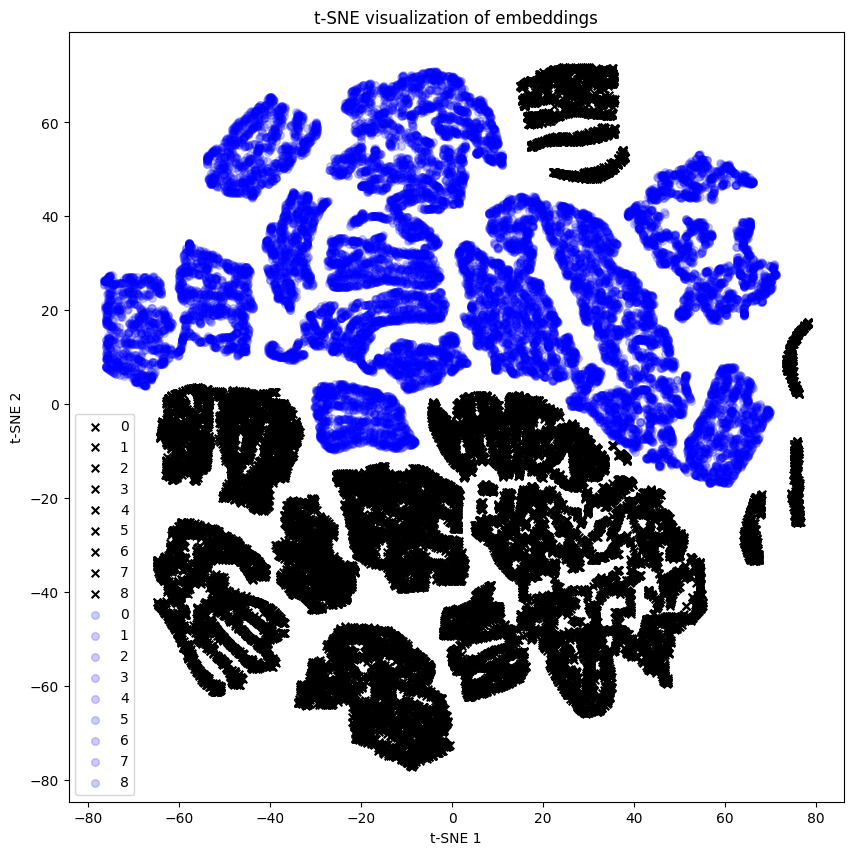

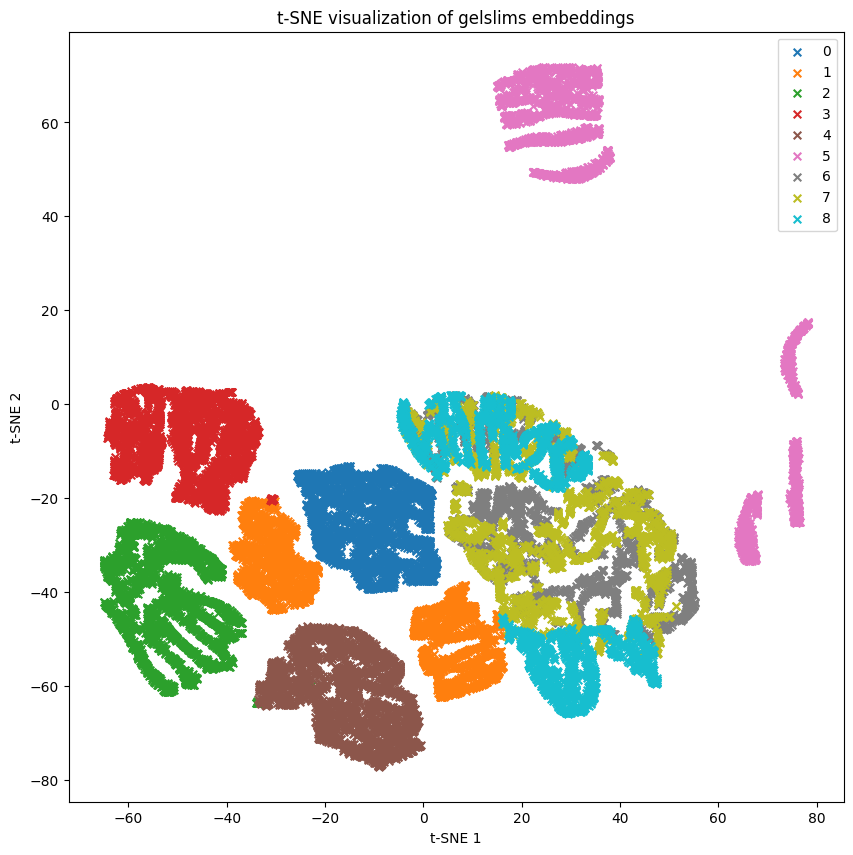

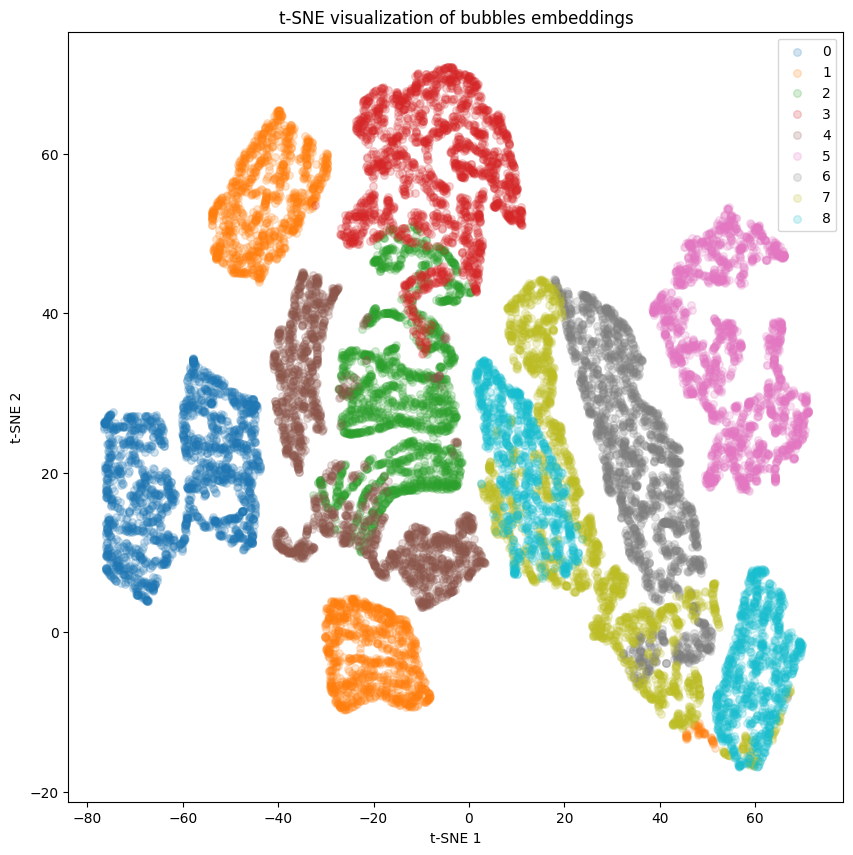

Run: dataset_1_run_full_logging


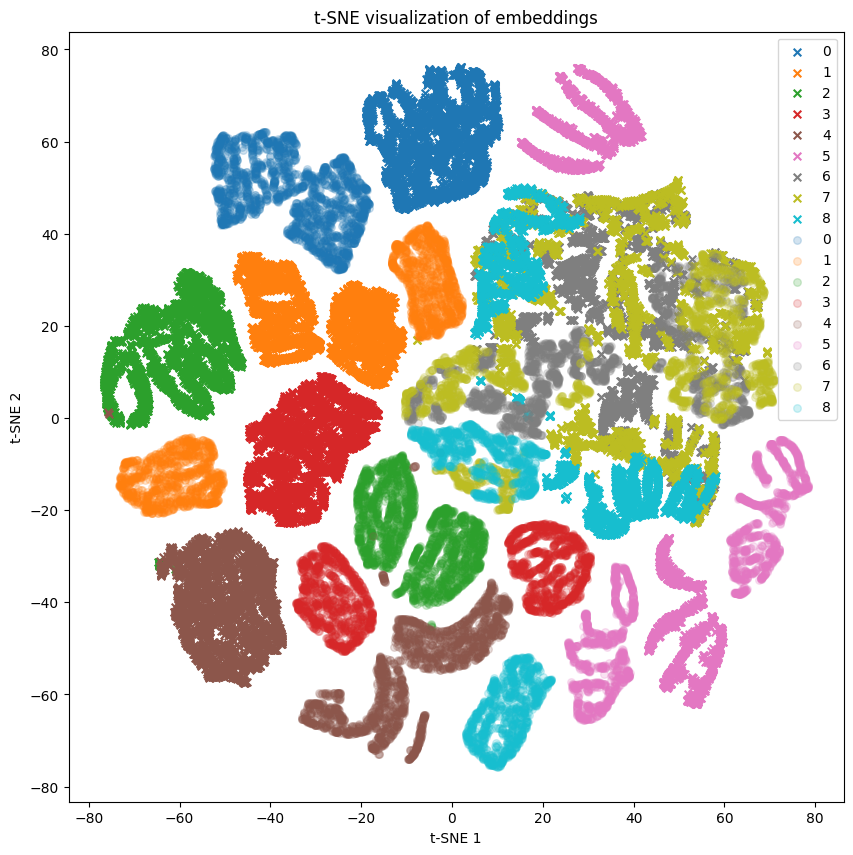

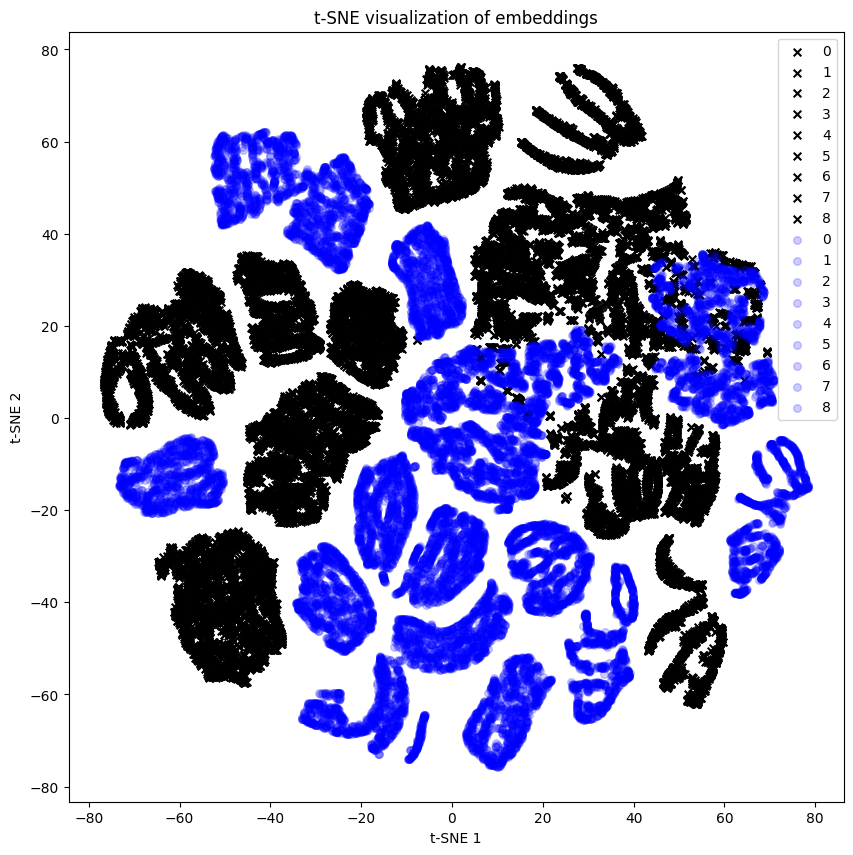

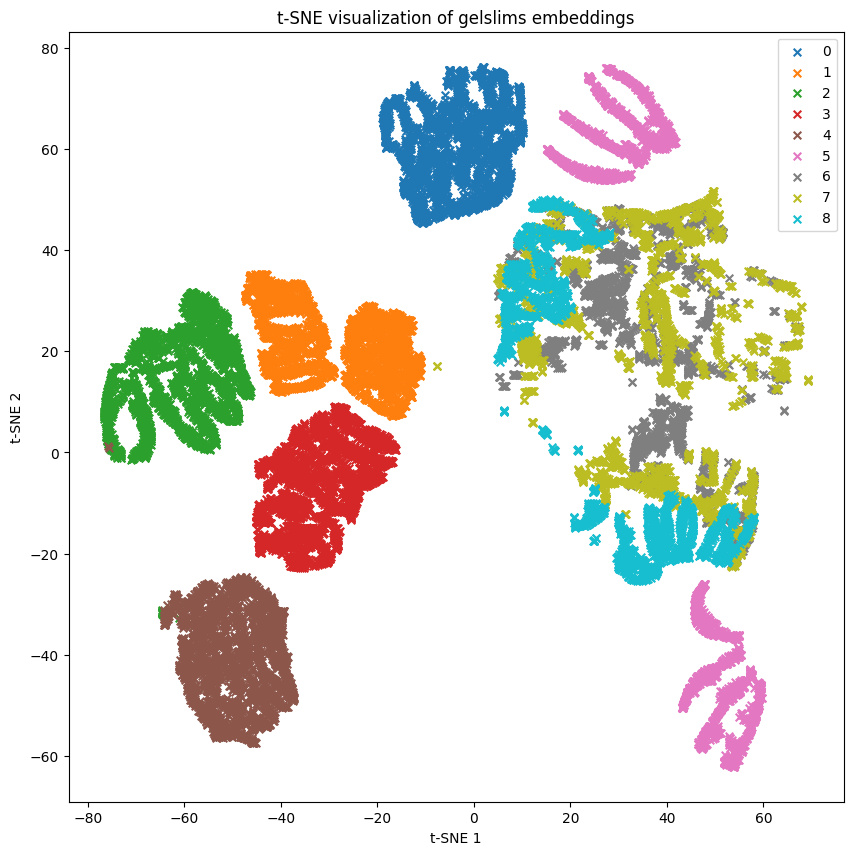

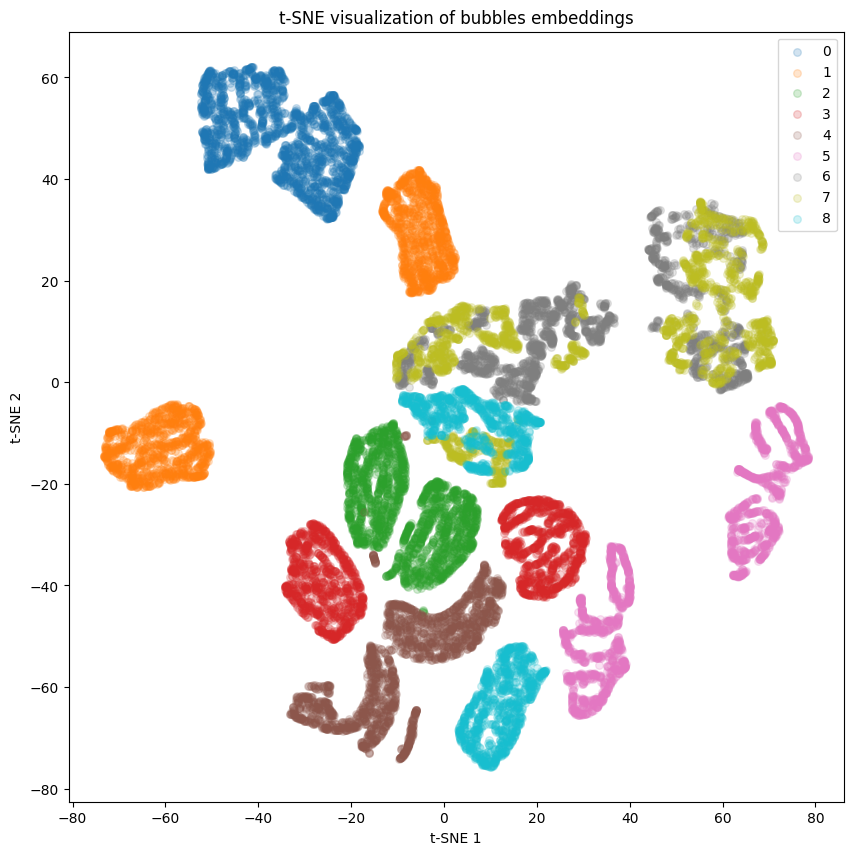

In [8]:
for run in runs:
    results_path = os.path.join(results_dir, run)
    print(f'Run: {run}')
    split = 'train'
    sensor = 'both'
    embeddings, labels, sensor_array = load_embeddings(results_path, split, sensor, dataset=dataset)
    tsne_embeddings = apply_tsne(embeddings)

    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    label_to_color = dict(zip(unique_labels, colors))
    g_embeddings = tsne_embeddings[sensor_array == 0]
    g_labels = labels[sensor_array == 0]
    b_embeddings = tsne_embeddings[sensor_array == 1]
    b_labels = labels[sensor_array == 1]

    # plt.figure(figsize=(10, 10))
    # plot_tsne(g_embeddings, g_labels, label_to_color, sensor='gelslim')
    # plot_tsne(b_embeddings, b_labels, label_to_color, sensor='bubbles')
    # plt.legend(markerscale=1)
    # plt.title('t-SNE visualization of embeddings')
    # plt.xlabel('t-SNE 1')
    # plt.ylabel('t-SNE 2')
    # plt.show()

    plt.figure(figsize=(10, 10))
    plot_tsne(g_embeddings, g_labels, label_to_color, sensor='gelslim', sensor_vis=True)
    plot_tsne(b_embeddings, b_labels, label_to_color, sensor='bubbles', sensor_vis=True)
    plt.legend(markerscale=1)
    plt.title('t-SNE visualization of embeddings')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

    # plt.figure(figsize=(10, 10))
    # plot_tsne(g_embeddings, g_labels, label_to_color, sensor='gelslim', sensor_vis=False)
    # plt.legend(markerscale=1)
    # plt.title('t-SNE visualization of gelslims embeddings')
    # plt.xlabel('t-SNE 1')
    # plt.ylabel('t-SNE 2')
    # plt.show()

    # plt.figure(figsize=(10, 10))
    # plot_tsne(b_embeddings, b_labels, label_to_color, sensor='bubbles', sensor_vis=False)
    # plt.legend(markerscale=1)
    # plt.title('t-SNE visualization of bubbles embeddings')
    # plt.xlabel('t-SNE 1')
    # plt.ylabel('t-SNE 2')
    # plt.show()